## Síntese de um compensador PID pelo método do lugar das raízes (*root locus*)

A função de transferência de malha aberta de um *piloto automático para o modo longitudinal (pitch) de um avião logo após retirar o trem de pouso frontal do solo no momento da decolagem* é:

\begin{align*}
        L(s)_{Ta\xrightarrow{} \theta} = \frac{0.0166 +0.000528 s+0.000328 s^2+3.05*10^{-7} s^3+6.33456*10^{-8} s^4}{-262625 -8353.09 s+ 278342 s^2+8901.38 s^3+5183.97 s^4+4.98525 s^5+s^6} 
\end{align*}


O sistema tem um polo de malha aberta no semi-plano direito, como pode ser observado na matriz de polos: 

\begin{align*}
Polos \;=\;
\begin{pmatrix}
  -1.6413 +71.5637i \\
  -1.6413 -71.5637i\\
  -0.8515 + 7.3848i\\
  -0.8515 - 7.3848i\\
   0.9663 + 0.0000i\\
  -0.9660 + 0.0000i\\
\end{pmatrix}
\end{align*}

Como visto pela matriz de zeros, o sistema é do tipo 0:

\begin{align*}
Zeros \;=\;
\begin{pmatrix}
  -1.6133 +71.5521i \\
  -1.6133 -71.5521i \\
  -0.7975 + 7.1081i \\
  -0.7975 - 7.1081i \\
\end{pmatrix}
\end{align*}


In [2]:
'''
%pip install matplotlib 
%pip install ipympl 
%pip install numpy 
%pip install sympy 
%pip install control 
%pip install tbcontrol
%pip install matplotlib ipympl jupyter

'''

'\n%pip install matplotlib \n%pip install ipympl \n%pip install numpy \n%pip install sympy \n%pip install control \n%pip install tbcontrol\n%pip install matplotlib ipympl jupyter\n\n'

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import sympy as sp
import control as ct
from tbcontrol.symbolic import routh
import matplotlib.transforms as transforms

s = ct.tf([1, 0], [1])

In [27]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Função de transferência de malha aberta na forma canônica

In [2]:
zeros = np.array([-1.6133 + (71.5521j),  -1.6133 - (71.5521j),  -0.7975 + (7.1081j),  -0.7975 - (7.1081j)])
poles = np.array([-1.6413 + (71.5637j),  -1.6413 - (71.5637j),  -0.8515 + (7.3848j),  -0.8515 - (7.3848j),   0.9663,  -0.9660])
Knum = 6.33456*10**(-8)
N = ct.tf(np.poly(zeros), [1])
D = ct.tf(np.poly(poles), [1])

L_0 = N/D
L_0 #Função de transferência na forma canônica

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05]), array([ 1.00000000e+00,  4.98530000e+00,  5.18397267e+03,  8.90145739e+03,
        2.78314545e+05, -8.39977113e+03, -2.64311757e+05]))

### 2. Determinação dos ganhos críticos via tabela de Routh

In [3]:
s_s = sp.symbols('s')
N_s = sp.Poly(np.poly(zeros), s_s)
D_s = sp.Poly(np.poly(poles), s_s)
N_s/D_s

(1.0*s**4 + 4.8216*s**3 + 5178.61327016*s**2 + 8335.15405231897*s + 262062.755077266)/(1.0*s**6 + 4.9853*s**5 + 5183.97267299*s**4 + 8901.45738838307*s**3 + 278314.545132264*s**2 - 8399.77113472094*s - 264311.756886443)

In [5]:
K_c = sp.symbols('K_c')
B_s = K_c * N_s + D_s #Polinômio Característico em Malha Fechada
table_B = routh(B_s)
table_B

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1.0,               

In [7]:
sp.solve(table_B[2, 0] > 0, K_c)

(-103495.42808964 < K_c) & (K_c < oo)

In [8]:
sp.solve(table_B[3, 0] > 0, K_c)

(-103495.42808964 < K_c) & (K_c < oo)

In [12]:
sp.solve(table_B[4, 0] > 0, K_c)

(-659.054585431138 < K_c) & (K_c < oo)

In [10]:
sp.solve(table_B[5, 0] > 0, K_c)

((-103495.428411585 < K_c) & (K_c < -103495.427767694)) | ((-659.054585431138 < K_c) & (K_c < -9.86911122321739)) | ((0.941219991510892 < K_c) & (K_c < 3497.91392379396)) | ((5073.13675808728 < K_c) & (K_c < oo))

In [10]:
sp.solve(table_B[6, 0] > 0, K_c)

((-103503.875614398 < K_c) & (K_c < -103486.976964407)) | ((-659.054585431138 < K_c) & (K_c < -659.054585431138)) | ((-9.86911122321739 < K_c) & (K_c < -9.86911122321739)) | ((0.941219991510892 < K_c) & (K_c < 0.941219991510894)) | ((1.00858192080181 < K_c) & (K_c < 3497.91392379392)) | ((3497.91392379399 < K_c) & (K_c < 5073.13675808718)) | ((5073.13675808738 < K_c) & (K_c < oo))

É possível ter um comportamento estável em malha fechada com controlador *proporcional* ($K_c$) se, e somente se: $$X<Kc <
 X$$

### 3. Síntese de um controlador PID via lugar das raízes

#### 3.1. Síntese de um compensador proporcional 

Lugar das raízes de $L(s)$

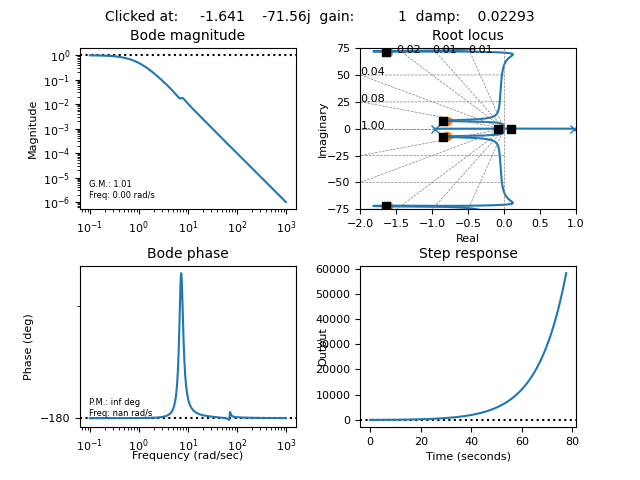

: 

In [74]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-2, 1), ylim_rlocus=(-75, 75),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

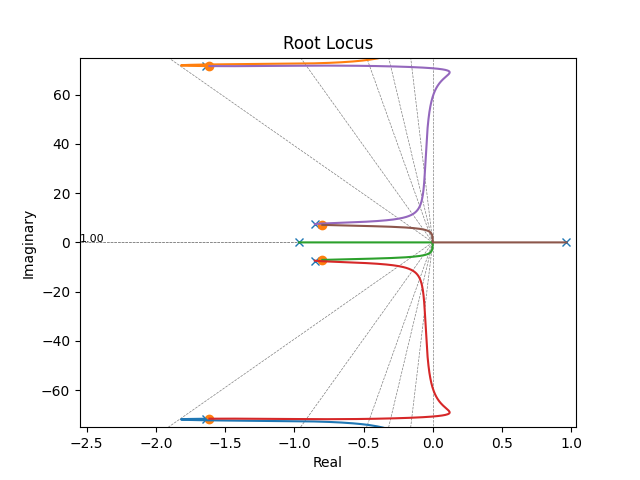

In [15]:
'''plt.close()
ct.rlocus(L_0)
plt.show()'''

plt.close()
def findlines(artist):
    return (isinstance(artist, plt.Line2D)
            and artist.get_linestyle()=='-'
            and isinstance(artist.get_xdata(), np.ndarray))
ct.rlocus(L_0)
plt.ylim(-75, 75)
h = plt.gca().findobj(match=findlines)
for i, h_ in enumerate(h): h_.set_color(f'C{i}')
plt.show()

A partir do lugar das raízes $L(s)$, pode-se escolher como valor inicial para o ganho $K_c =  64.66 \approx 65$ que, tirando o $K_{num}$, resulta em um ganho proporcional de $K_p = 10,2075\cdot 10^8$.

#### 3.2. Síntese de um compensador PI

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-integral* (PI), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PI}}(s) = \left( K_p + \frac{K_i}{s} \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} +  K_i \frac{N(s)}{s D(s)} = 0
    \\ 
    & s[D(s) + K_p N(s)] +  K_i N(s) = 0
    \\ 
    & 1 +  K_i \underbrace{\frac{N(s)}{s [D(s) + K_p N(s)]}}_{\displaystyle L_1(s)} = 0
\end{align*}


In [17]:
K_p = 65
L_1 = N/(s * (D + K_p * N))
L_1

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05]), array([1.00000000e+00, 4.98530000e+00, 5.24897267e+03, 9.21486139e+03,
       6.14924408e+05, 5.33385242e+05, 1.67697673e+07, 0.00000000e+00]))

Lugar das raízes de $L_1(s)$ e ajuste de $K_i$ 

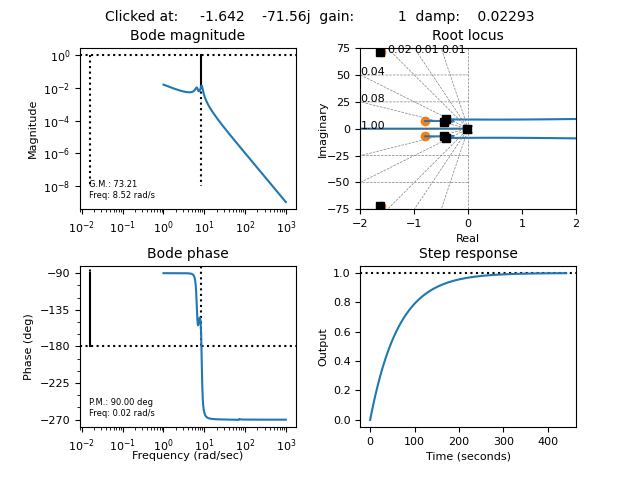

Clicked at    -0.1157   +0.3613j gain      7.354 damp     0.3049
Clicked at    -0.2362  +0.06531j gain      15.13 damp     0.9638
Clicked at    -0.3065    +8.649j gain      17.55 damp    0.03542
Clicked at    -0.3701    -8.519j gain      13.86 damp    0.04341
Clicked at    -0.3259    +7.088j gain      178.8 damp    0.04593
Clicked at     -0.399    +6.733j gain      42.82 damp    0.05915
Clicked at    -0.5764   +0.6825j gain      36.22 damp     0.6452
Clicked at    -0.4546   +0.1487j gain      29.16 damp     0.9505
Clicked at    -0.2807   -0.3851j gain      17.85 damp      0.589
Clicked at    -0.3329   +0.3266j gain      21.22 damp     0.7137
Clicked at    -0.3155   +0.3266j gain      20.11 damp     0.6947
Clicked at    -0.3015   +0.3266j gain      19.22 damp     0.6783
Clicked at    -0.2354   +0.5046j gain      14.89 damp     0.4229
Clicked at    -0.4268  -0.02925j gain      27.39 damp     0.9977
Clicked at    -0.4094   -0.3851j gain      26.07 damp     0.7284
Clicked at     -0.385   +

In [19]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)
plt.draw()  

A partir da análise do lugar das raízes para $L_1(s)$, chega-se a $K_{i_c} = 16.85 \ \text{s}^{-1}$ como escolha razoável para o ganho, resultando em $K_p = 26,6*10^7$.

Assim pode-se calcular $T_i$ pela expressão:
$$T_i = \frac{K_p}{K_i}$$

In [20]:
K_i = 17
T_i = K_p/K_i
T_i

3.823529411764706

Assumindo os valor calculados para $T_i$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PI}}(s) = K_c \left(1 + \frac{1}{T_i s}\right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PI}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s)N(s)}{s T_i D(s)}}_{\displaystyle L_2(s)} = 0
\end{align*}


In [21]:
L_2 = (1 + T_i * s) * N/(s * T_i * D)
L_2

TransferFunction(array([3.82352941e+00, 1.94355294e+01, 1.98054018e+04, 3.70483199e+04,
       1.01033981e+06, 2.62062755e+05]), array([ 3.82352941e+00,  1.90614412e+01,  1.98210720e+04,  3.40349841e+04,
        1.06414385e+06, -3.21167720e+04, -1.01060378e+06,  0.00000000e+00]))

Lugar das raízes de $L_2(s)$ e ajuste fino de $K_c$

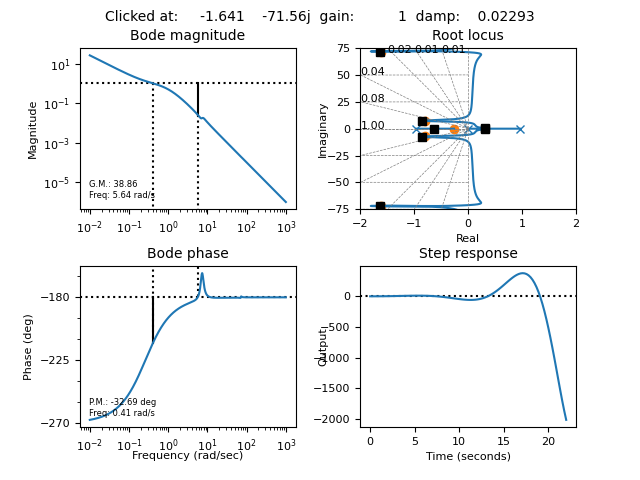

Clicked at   -0.09465     -6.52j gain      55.38 damp    0.01452
Clicked at    -0.5473  -0.01721j gain      1.308 damp     0.9995
Clicked at    -0.9051  -0.01721j gain     0.1729 damp     0.9998
Clicked at    -0.6723  -0.01721j gain     0.8499 damp     0.9997
Clicked at    -0.0386    -5.869j gain      42.77 damp   0.006577
Clicked at    -0.1464    -6.194j gain      49.53 damp    0.02362
Clicked at    -0.2714    -6.194j gain      50.48 damp    0.04377
Clicked at     -0.211    -6.194j gain      50.04 damp    0.03405
Clicked at    -0.2412    -6.194j gain      50.26 damp    0.03891
Clicked at    -0.1981    -6.845j gain      62.13 damp    0.02893
Clicked at    -0.3964    -5.869j gain      43.71 damp    0.06739
Clicked at    -0.1464    -5.869j gain      43.18 damp    0.02493
Clicked at    -0.2067    -5.219j gain      32.78 damp    0.03958
Clicked at    -0.3533    -5.544j gain      37.73 damp     0.0636
Clicked at    -0.3059    +9.086j gain      74.57 damp    0.03365
Clicked at    -0.3749  -0

In [24]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_2, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Obtém-se assim $K_c = 91$ = $K_p = 14,3656*10^8$, o que leva o seguinte compensador PI:

In [25]:
K_c_PI = 91

G_c_PI = K_c_PI * (1 + 1/(T_i * s))
G_c_PI

TransferFunction(array([347.94117647,  91.        ]), array([3.82352941, 0.        ]))

Diagrama de Bode do compensador PID sintetizado

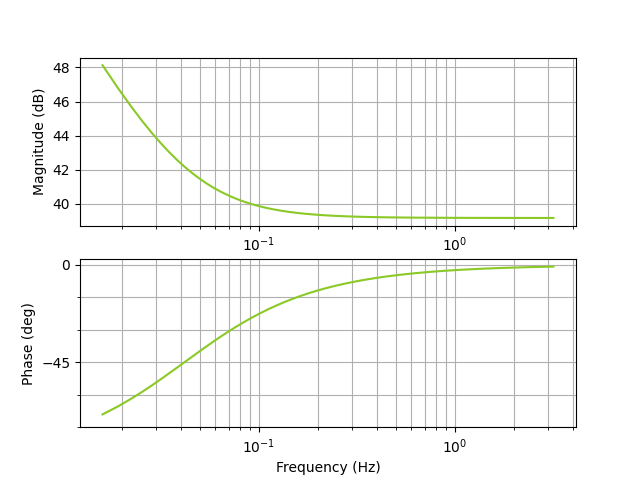

In [28]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PI,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['green'],
                                   dB=True, Hz=True)

#### 3.3. Síntese de um compensador PID

Podemos agora trocar o controlador *proporcional-integral* (PI) por um *proporcional-integral-derivativo* (PID), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PID}}(s) = \left( K_p + \frac{K_i}{s} + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + K_i \frac{N(s)}{s D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & s D(s) + (K_p s + K_i)N(s) + K_d s^2 N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s^2 N(s)}{s D(s) + (K_p s + K_i)N(s)}}_{\displaystyle L_3(s)} = 0
\end{align*}

In [29]:
L_3 = (s * s * N)/(s * D + (K_p * s + K_i) * N)
L_3

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05, 0.00000000e+00, 0.00000000e+00]), array([1.00000000e+00, 4.98530000e+00, 5.24897267e+03, 9.23186139e+03,
       6.15006375e+05, 6.21421668e+05, 1.69114649e+07, 4.45506684e+06]))

Lugar das raízes de $L_3(s)$ e ajuste de $K_d$

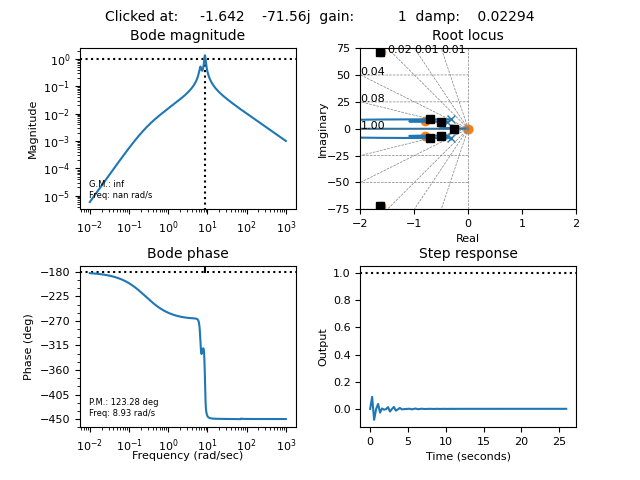

Clicked at    -0.4773    -0.217j gain      70.97 damp     0.9103
Clicked at     -0.399   +0.4439j gain      77.17 damp     0.6685
Clicked at    -0.3545   +0.2031j gain      84.78 damp     0.8677
Clicked at    -0.1875   +0.3383j gain      140.6 damp     0.4849
Clicked at    -0.3782  -0.03733j gain      52.54 damp     0.9952
Clicked at    -0.4672  -0.03733j gain       60.2 damp     0.9968
Clicked at    -0.5212  -0.03733j gain      61.09 damp     0.9974
Clicked at    -0.9216   +0.3383j gain      48.74 damp     0.9388
Clicked at    -0.6134  -0.03733j gain      59.92 damp     0.9982
Clicked at     -1.055   +0.1505j gain      46.21 damp       0.99
Clicked at   0.003117  -0.03733j gain   1.18e+04 damp   -0.08319
Clicked at    -0.5434   +0.1505j gain      64.11 damp     0.9637
Clicked at     -1.125   +0.1505j gain      44.37 damp     0.9912
Clicked at    -0.8199    -6.611j gain      3.721 damp     0.1231
Clicked at    -0.9121    -6.423j gain      3.971 damp     0.1406
Clicked at     -1.052    

In [30]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_3, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_3(s)$, chega-se a $K_{d_c} = 4 \ \text{s}$ ($K_d = 63,1456*10^6$) como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [31]:
K_d = 4
T_d = K_d/K_p
T_d

0.06153846153846154

Finalmente, assumindo os valores calculados para $T_i$ e $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PID}}(s) = K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PID}}(s) = 0 
    \\
    & 1 +  K_c \left(1 + \frac{1}{T_i s} + T_d s \right) \frac{N(s)}{D(s)} = 0
    \\
    & 1 +  K_c \underbrace{\frac{(1 + T_i s + T_d T_i s^2)N(s)}{s T_i D(s)}}_{\displaystyle L_4(s)} = 0
\end{align*}


In [32]:
L_4 = ((1 + T_i * s + T_d * T_i * s * s) * N)/(s * T_i * D)
L_4

TransferFunction(array([2.35294118e-01, 4.95802353e+00, 1.23793277e+03, 2.17666145e+04,
       9.87101447e+04, 1.01033981e+06, 2.62062755e+05]), array([ 3.82352941e+00,  1.90614412e+01,  1.98210720e+04,  3.40349841e+04,
        1.06414385e+06, -3.21167720e+04, -1.01060378e+06,  0.00000000e+00]))

Lugar das raízes de $L_4(s)$ e ajuste fino de $K_c$

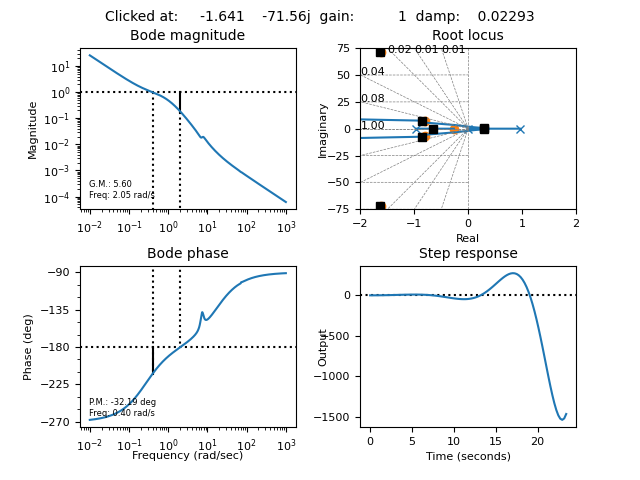

Clicked at    -0.2258    -3.512j gain      14.85 damp    0.06417
Clicked at    -0.5136    -5.073j gain       31.3 damp     0.1007
Clicked at    -0.4448  +0.05451j gain      1.948 damp     0.9926
Clicked at    -0.1946    -3.289j gain       13.1 damp    0.05904
Clicked at    -0.2947    -3.735j gain       16.8 damp    0.07864
Clicked at    -0.3823    -3.958j gain      18.94 damp    0.09612
Clicked at    -0.4824    -4.181j gain      21.27 damp     0.1146
Clicked at    -0.6701    -4.181j gain      21.68 damp     0.1582
Clicked at    -0.6826    -5.073j gain      31.96 damp     0.1333
Clicked at    -0.7576    -5.519j gain       38.7 damp      0.136
Clicked at     -1.164    -7.971j gain      45.87 damp     0.1445
Clicked at     -0.864    -6.856j gain      98.66 damp      0.125
Clicked at    -0.8452    -6.856j gain      100.3 damp     0.1223
Clicked at    -0.8703    -6.188j gain      52.89 damp     0.1393
Clicked at    -0.8014    -5.519j gain      38.87 damp     0.1437
Clicked at    -0.8577    

In [36]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_4, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Assim, adotando $K_c = 55$ ($K_p =86,825*10^7$), tem-se o seguinte compensador PID:

In [37]:
K_c_PID = 55
N_d = 1000

G_c_PID = K_c_PID * (1 + 1/(T_i * s) + (T_d * s)/(1 + T_d * s/N_d))
G_c_PID

TransferFunction(array([ 12954.11764706, 210297.50226244,  55000.        ]), array([2.35294118e-01, 3.82352941e+03, 0.00000000e+00]))

Diagrama de Bode do compensador PID sintetizado

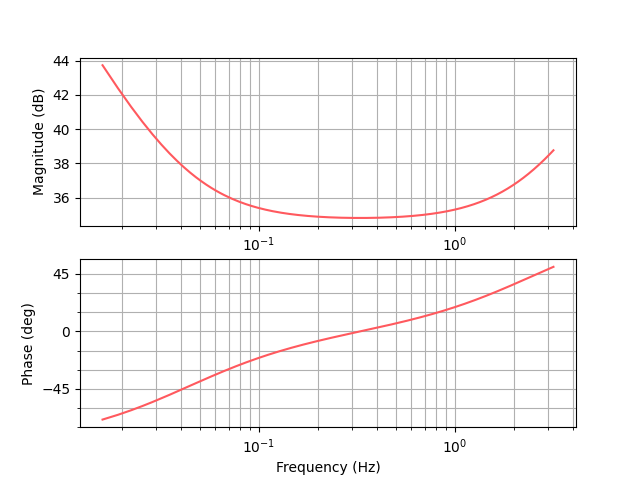

In [38]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PID,
                                omega=np.linspace(0.1, 20, 1001),
                                color=cp['red'],
                                dB=True, Hz=True)

#### 3.4. Síntese de um compensador PD

Podemos agora trocar o controlador *proporcional* (P) por um *proporcional-derivativo* (PD), de tal forma que a nova FTMA se torna:
\begin{align*}
    L_{\text{PD}}(s) = \left( K_p + K_d s \right) \frac{N(s)}{D(s)}
\end{align*}
Assim, as novas raízes em malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 + K_p \frac{N(s)}{D(s)} + \frac{K_d s N(s)}{D(s)} = 0
    \\ 
    & D(s) + K_p N(s) + K_d s N(s) = 0
    \\ 
    & 1 +  K_d \underbrace{\frac{s N(s)}{D(s) + K_p N(s)}}_{\displaystyle L_5(s)} = 0
\end{align*}

In [43]:
L_5 = (s * N)/(D + K_p * N)
L_5

TransferFunction(array([1.00000000e+00, 4.82160000e+00, 5.17861327e+03, 8.33515405e+03,
       2.62062755e+05, 0.00000000e+00]), array([1.00000000e+00, 4.98530000e+00, 5.24897267e+03, 9.21486139e+03,
       6.14924408e+05, 5.33385242e+05, 1.67697673e+07]))

Lugar das raízes de $L_5(s)$ e ajuste de $K_d$

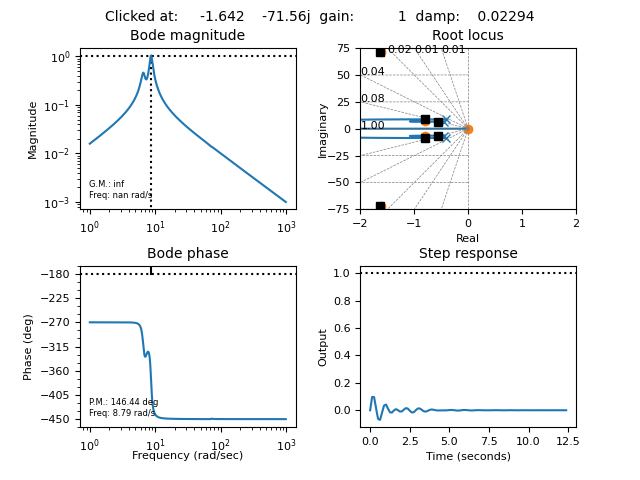

Clicked at    -0.6516    -8.047j gain     0.2636 damp    0.08072
Clicked at    -0.6664    -6.428j gain      1.946 damp     0.1031
Clicked at    -0.9619    -6.967j gain      11.01 damp     0.1368
Clicked at    -0.8474    -6.428j gain      3.186 damp     0.1307
Clicked at     -0.718    -6.387j gain      2.304 damp     0.1117
Clicked at    -0.6792    +6.604j gain      1.869 damp     0.1023


In [46]:
plt.close()

plt.ion()  # ativar o modo interativo
ct.sisotool(L_5, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

A partir da análise do lugar das raízes para $L_5(s)$, chega-se a $K_{d_c} = 2 \ \text{s}$ ($K_d = 31,573*10^6$) como escolha razoável para o ganho derivativo.

Assim pode-se calcular $T_d$ pelas expressão:
$$T_d = \frac{K_d}{K_p}$$

In [47]:
K_d = 2
T_d = K_d/K_p
T_d

0.03076923076923077

Finalmente, assumindo os valor calculado para $T_d$, pode-se fazer um ajuste fino para $K_c$:
\begin{align*}
    L_{\text{PD}}(s) = K_c \left(1 + T_d s \right) \frac{N(s)}{D(s)}
\end{align*}
As raízes de malha fechada serão dadas por:
\begin{align*}
    & 1 + L_{\text{PD}}(s) = 0 
    \\
    & 1 +  K_c \underbrace{\frac{\left(1 + T_d s \right) N(s)}{D(s)}}_{\displaystyle L_6(s)} = 0
\end{align*}

In [48]:
L_6 = ((1 + T_d * s) * N)/D
L_6

TransferFunction(array([3.07692308e-02, 1.14835692e+00, 1.64163547e+02, 5.43507955e+03,
       1.63986234e+04, 2.62062755e+05]), array([ 1.00000000e+00,  4.98530000e+00,  5.18397267e+03,  8.90145739e+03,
        2.78314545e+05, -8.39977113e+03, -2.64311757e+05]))

Lugar das raízes de $L_6(s)$ e ajuste fino de $K_c$

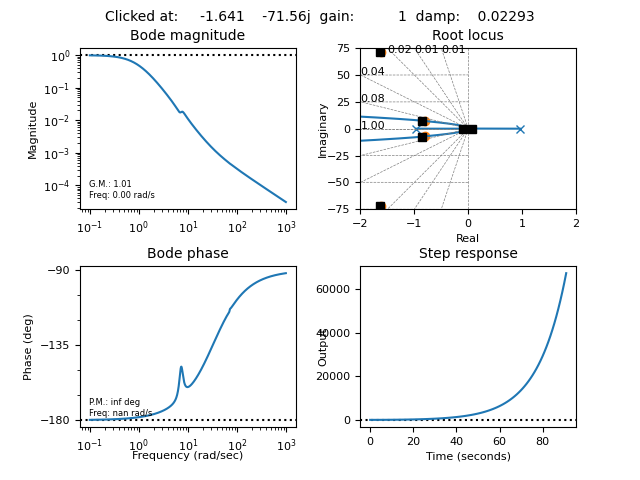

Clicked at    -0.4982    +5.998j gain       47.1 damp    0.08277
Clicked at    -0.6969    +6.432j gain      61.74 damp     0.1077
Clicked at     -1.499    -10.07j gain      96.13 damp     0.1472
Clicked at     -1.272    -9.419j gain      81.37 damp     0.1338
Clicked at     -1.109    -8.768j gain      66.77 damp     0.1254
Clicked at    -0.4201    -5.294j gain       34.3 damp    0.07911
Clicked at    -0.1787    -3.339j gain      13.36 damp    0.05345
Clicked at    -0.6472    -6.379j gain      59.19 damp     0.1009


In [51]:
plt.close()
plt.ion()  # ativar o modo interativo
ct.sisotool(L_6, xlim_rlocus=(-2, 2), ylim_rlocus=(-75, 75),
            rlocus_grid=True)  # ferramenta interativa SISO Design Tool
plt.draw()  # desenhar a janela interativa

Assim, adotando $K_c = 59$ ($K_p = 93,139*10^7$), tem-se o seguinte compensador PD:


In [52]:
K_c_PD = 59
N_d = 1000

G_c_PD = K_c_PD * (1 + (T_d * s)/(1 + T_d * s/N_d))
G_c_PD

TransferFunction(array([ 1817.2, 59000. ]), array([3.07692308e-02, 1.00000000e+03]))

Diagrama de Bode do compensador PD sintetizado

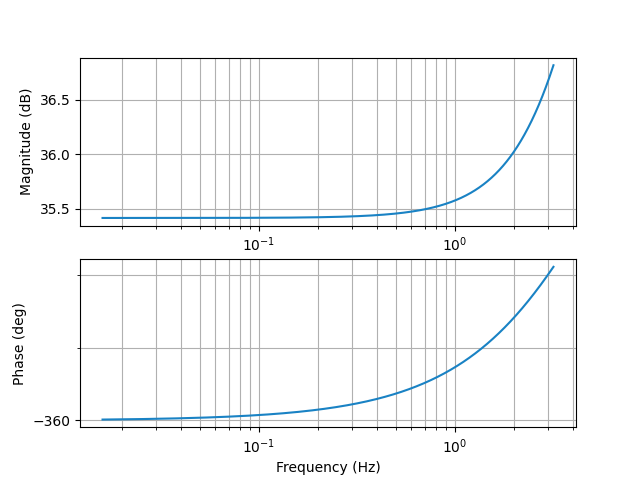

In [53]:
plt.figure()
G_c_M, G_c_φ, G_c_ω = ct.bode_plot(G_c_PD,
                                   omega=np.linspace(0.1, 20, 1001),
                                   color=cp['blue'],
                                   dB=True, Hz=True)

### 4. Análise das respostas em malha fechada com compensadores PI, PD e PID

#### 4.1. Função de transferência entre referência (r) e saída (c)

In [59]:
print('Função de transferência PI:')
rc_tf_PI = ct.feedback(G_c_PI * L_0)
rc_tf_PI

Função de transferência PI:


TransferFunction(array([3.47941176e+02, 1.76863318e+03, 1.80229156e+06, 3.37139711e+06,
       9.19409223e+07, 2.38477107e+07]), array([3.82352941e+00, 1.90614412e+01, 2.01690132e+04, 3.58036173e+04,
       2.86643541e+06, 3.33928034e+06, 9.09303186e+07, 2.38477107e+07]))

In [60]:
print('Função de transferência PD:')
rc_tf_PD = ct.feedback(G_c_PD * L_0)
rc_tf_PD

Função de transferência PD:


TransferFunction(array([1.81720000e+03, 6.77618115e+04, 9.69505043e+06, 3.20684825e+08,
       9.67994528e+08, 1.54617025e+10]), array([3.07692308e-02, 1.00015339e+03, 6.96200685e+03, 5.25200838e+06,
       1.86050713e+07, 5.98999112e+08, 9.59586624e+08, 1.51973908e+10]))

In [61]:
print('Função de transferência PID:')
rc_tf_PID = ct.feedback(G_c_PID * L_0)
rc_tf_PID

Função de transferência PID:


TransferFunction(array([1.29541176e+04, 2.72757076e+05, 6.81533360e+07, 1.19728919e+09,
       5.43247757e+09, 5.55695763e+10, 1.44134515e+10]), array([2.35294118e-01, 3.82470242e+03, 3.32353171e+04, 2.00959235e+07,
       1.02253806e+08, 2.26143106e+09, 5.40029861e+09, 5.45589725e+10,
       1.44134515e+10]))

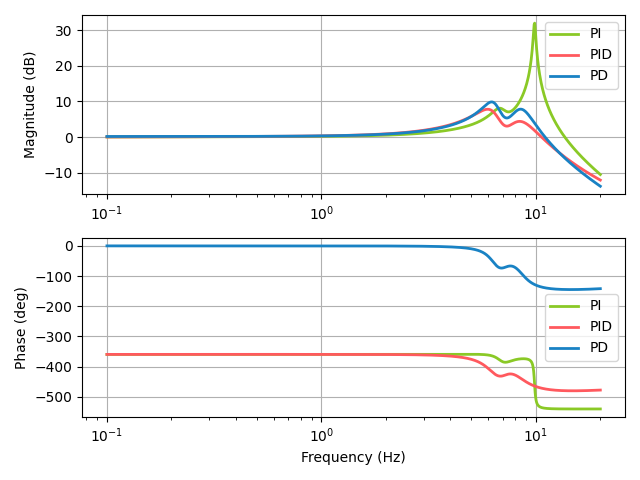

In [62]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    rc_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    rc_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    rc_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.2. Função de transferência entre referência (r) e entrada de controle (u)

In [73]:
ru_tf_PI = ct.feedback(G_c_PI, L_0)
ru_tf_PD = ct.feedback(G_c_PD, L_0)
ru_tf_PID = ct.feedback(G_c_PID, L_0)
ru_tf_PID 

TransferFunction(array([ 1.29541176e+04,  2.74877665e+05,  6.82571880e+07,  1.20576122e+09,
        5.76239211e+09,  5.89096222e+10,  1.01169235e+10, -5.60460897e+10,
       -1.45371466e+10]), array([2.35294118e-01, 3.82470242e+03, 3.32353171e+04, 2.00959235e+07,
       1.02253806e+08, 2.26143106e+09, 5.40029861e+09, 5.45589725e+10,
       1.44134515e+10]))

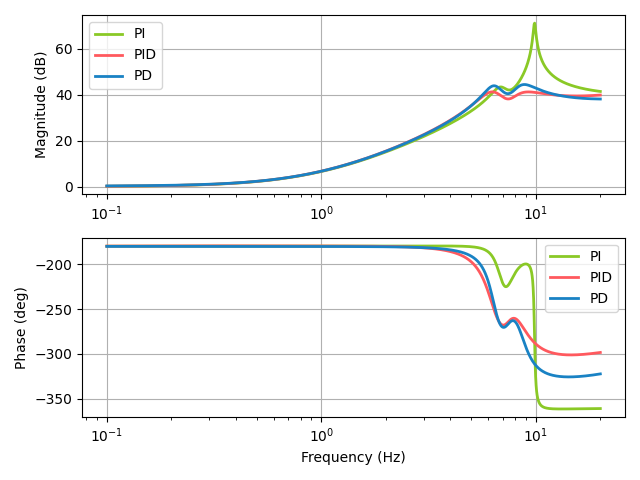

In [65]:
plt.figure()
plt.subplot(2, 1, 1)

mag_PI, phase_PI, omega_PI = ct.bode(
    ru_tf_PI, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PID, phase_PID, omega_PID = ct.bode(
    ru_tf_PID, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)
mag_PD, phase_PD, omega_PD = ct.bode(
    ru_tf_PD, dB=True, Hz=True, omega_limits=(0.1, 20), plot=False)


plt.semilogx(omega_PI, 20 * np.log10(mag_PI),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, 20 * np.log10(mag_PID),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, 20 * np.log10(mag_PD),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Magnitude (dB)')

# plt.title('Magnitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(omega_PI, phase_PI * (180.0 / np.pi),
             label='PI', color=cp['green'], linewidth=2)
plt.semilogx(omega_PID, phase_PID * (180.0 / np.pi),
             label='PID', color=cp['red'], linewidth=2)
plt.semilogx(omega_PD, phase_PD * (180.0 / np.pi),
             label='PD', color=cp['blue'], linewidth=2)
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (Hz)')
# plt.title('Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### 4.3. Resposta a degrau

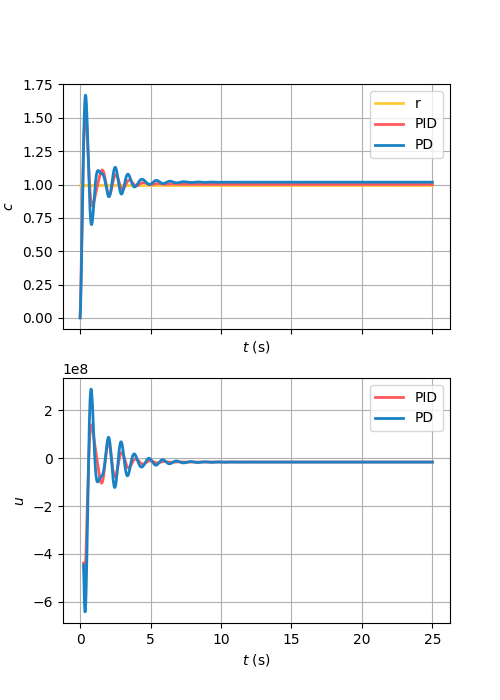

In [71]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

# t, y_PI = ct.step_response(rc_tf_PI, ts)
# t, u_PI = ct.step_response(ru_tf_PI, ts)

t, y_PID = ct.step_response(rc_tf_PID, ts)
t, u_PID = ct.step_response(ru_tf_PID/Knum, ts)

t, y_PD = ct.step_response(rc_tf_PD, ts)
t, u_PD = ct.step_response(ru_tf_PD/Knum, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
#state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:], color=cp['green'], 
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 4.4. Resposta a rampa

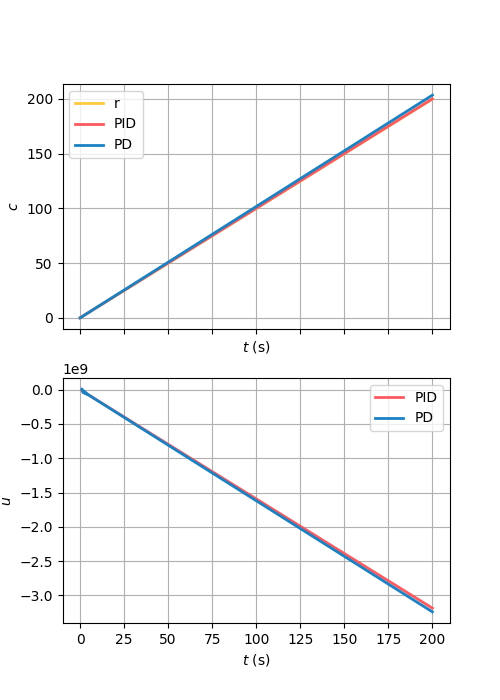

In [72]:
# simulação do sistema em MF
ts = np.linspace(0, 200, 2000)

# t, y_PI = ct.forced_response(rc_tf_PI, ts, U=ts)
# t, u_PI = ct.forced_response(ru_tf_PI, ts, U=ts)

t, y_PID = ct.forced_response(rc_tf_PID, ts, U=ts)
t, u_PID = ct.forced_response(ru_tf_PID/Knum, ts, U=ts)

t, y_PD = ct.forced_response(rc_tf_PD, ts, U=ts)
t, u_PD = ct.forced_response(ru_tf_PD/Knum, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y_PID, color=cp['red'], label='PID', linewidth=2)
state.plot(t, y_PD, color=cp['blue'], label='PD', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

# control_input.plot(t[10:], u_PI[10:], color=cp['green'],
#                    label='PI', linewidth=2)
control_input.plot(t[10:], u_PID[10:], color=cp['red'],
                   label='PID', linewidth=2)
control_input.plot(t[10:], u_PD[10:], color=cp['blue'],
                   label='PD', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()